# 🎯 **Brain Tumor Classification with Deep Learning**
Welcome to this notebook on **Brain Tumor Classification using Deep Learning 4DS9**!   
We will walk through each step of building a **deep learning model** to classify brain tumors using **VGG16** pretrained model and creating our model from zero and compaire between them .

---

## 📌 **Step 1: Importing Required Libraries**
Before we begin, let's import the necessary Python libraries.


In [3]:
import os
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle


## 🗂️ **Step 2: Loading and Splitting the Dataset**
Now  our dataset organized in a single folder, we need to:
✅ **Load** all image paths and their corresponding labels.  
✅ **Shuffle** the dataset to prevent order-related bias.  
✅ **Split** it into **80% training** and **20% testing** data.  

---

### 📂 **Dataset Structure**
Our dataset is stored in the following location:

```plaintext
C:\Users\majdz\OneDrive\Desktop\data


In [6]:
data_dir = r"C:\Users\majdz\OneDrive\Desktop\data"  # CHANGE to your path

image_paths = []
labels = []

# Loop through each subfolder in 'data' directory
for label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, label)
    if os.path.isdir(class_dir):  # Check that it's a folder
        for image_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, image_file)
            image_paths.append(img_path)
            labels.append(label)

# Shuffle before splitting to remove any ordering bias
image_paths, labels = shuffle(image_paths, labels, random_state=42)


In [8]:
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

print(f"Total images: {len(image_paths)}")
print(f"Training images: {len(train_paths)}")
print(f"Testing images: {len(test_paths)}")


Total images: 1311
Training images: 1048
Testing images: 263


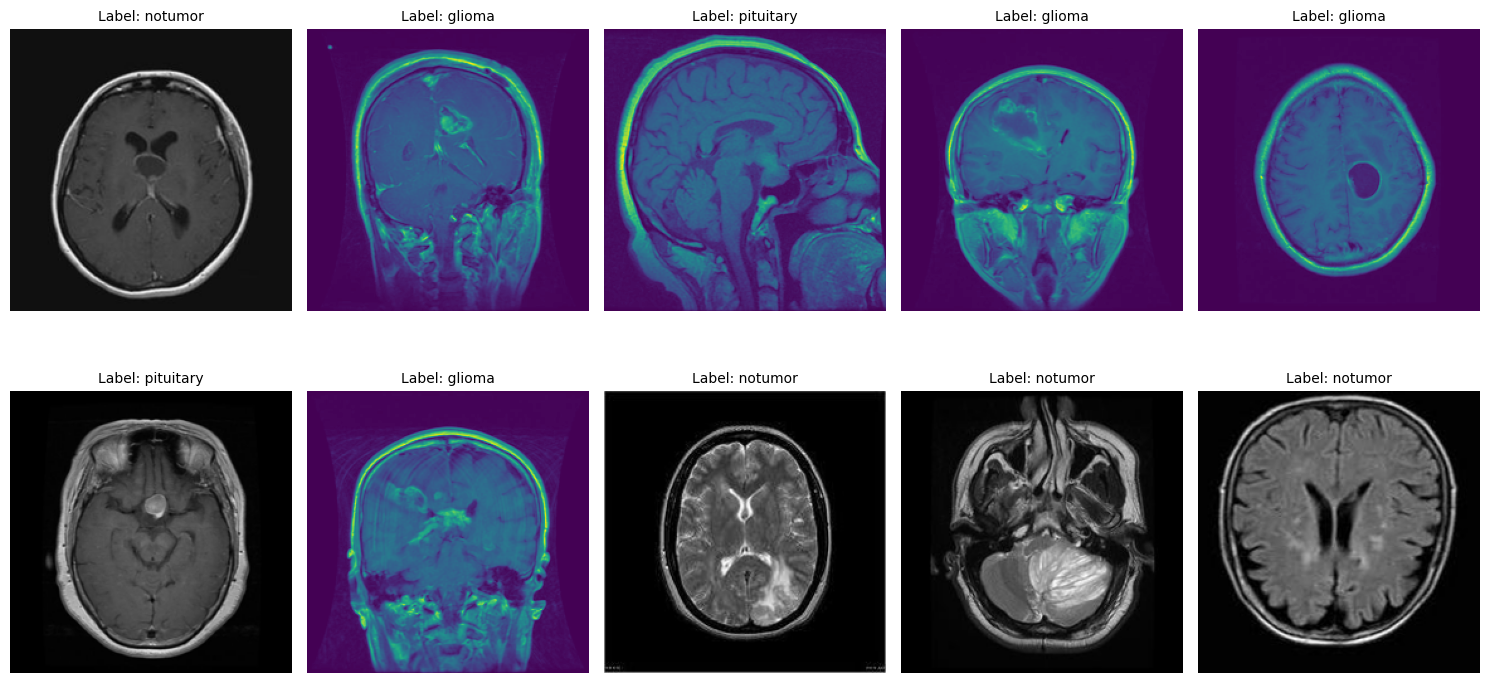

In [10]:

# Select random indices for 10 images
random_indices = random.sample(range(len(train_paths)), 10)

# Create a figure to display images in 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    # Load image
    img_path = train_paths[idx]
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize to consistent size

    # Display image
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis
    # Display class label in the second row
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize=10)

plt.tight_layout()
plt.show()

# 🧠 Brain Tumor Classification using VGG16 (Transfer Learning)

## 📌 Introduction
In this part, we use **Transfer Learning** with **VGG16**, a powerful **pretrained deep learning model**, to classify **brain tumors** into four categories:
- **Glioma**
- **Meningioma**
- **Pituitary**
- **No Tumor**

Instead of training a CNN from scratch, we **leverage VGG16’s knowledge**, which was pretrained on **millions of images** in ImageNet. 

---

## 🚀 Step 1: Data Preprocessing

Before training the model, we **preprocess the dataset**:
✅ **Load and normalize images** to **224x224 pixels**.  
✅ **Apply VGG16-specific preprocessing** for optimal performance.  
✅ **Convert labels to one-hot encoding** for classification.

```python
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import LabelBinarizer

IMG_SIZE = (224, 224)

def load_and_preprocess_image(img_path):
    img = Image.open(img_path).convert("RGB")  # Ensure RGB format
    img = img.resize(IMG_SIZE)  # Resize to 224x224
    img_array = np.array(img)
    img_array = preprocess_input(img_array)  # Preprocess for VGG16
    img_array = img_array / 255.0  # Normalize to [0,1]
    return img_array

# Convert images to numpy arrays
x_train = np.array([load_and_preprocess_image(p) for p in train_paths])
x_test = np.array([load_and_preprocess_image(p) for p in test_paths])

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(train_labels)
y_test = lb.transform(test_labels)

# Print shapes to verify
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


In [49]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input

IMG_SIZE = (224, 224)

def load_and_preprocess_image(img_path):
    """
    1. Load image from path
    2. Convert to RGB (if not already)
    3. Resize to IMG_SIZE (224 x 224)
    4. Convert to numpy array
    5. Preprocess according to VGG16 needs
    """
    img = Image.open(img_path).convert("RGB")
    img = img.resize(IMG_SIZE)
    img_array = np.array(img)
    img_array = preprocess_input(img_array)  # Preprocess for VGG16
    img_array = img_array / 255.0  # Normalize to [0,1]
    return img_array



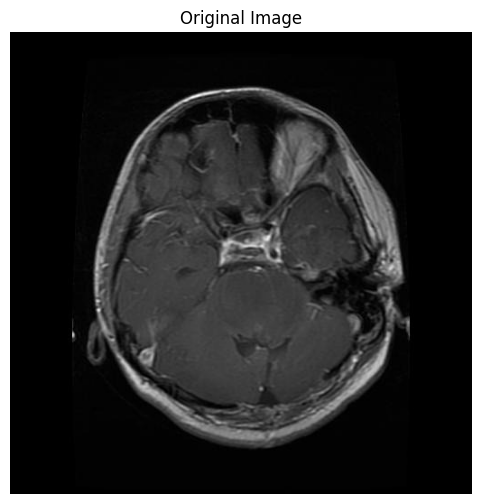

Processed Image Shape: (224, 224, 3)
Processed Image Array (First 5 Pixels):
[[[-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]]

 [[-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]]

 [[-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]]

 [[-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]]

 [[-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.4850196 ]
  [-0.40760392 -0.45795685 -0.48501

In [51]:
# Example MRI image path
example_img_path = "C:\\Users\\majdz\\OneDrive\\Desktop\\data\\glioma\\Te-gl_0010.jpg"  # Change this!

# Load and preprocess the image
processed_img = load_and_preprocess_image(example_img_path)

# Show the original image
original_img = Image.open(example_img_path).convert("RGB")
plt.figure(figsize=(6, 6))
plt.imshow(original_img)
plt.axis("off")
plt.title("Original Image")
plt.show()

# Print shape and values of preprocessed image
print(f"Processed Image Shape: {processed_img.shape}")
print(f"Processed Image Array (First 5 Pixels):\n{processed_img[:5, :5, :]}")  # Print a small portion


In [53]:
# Convert images to numpy arrays
x_train = np.array([load_and_preprocess_image(p) for p in train_paths])
x_test = np.array([load_and_preprocess_image(p) for p in test_paths])

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(train_labels)
y_test = lb.transform(test_labels)

# Print shapes to verify
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (1048, 224, 224, 3)
y_train shape: (1048, 4)
x_test shape: (263, 224, 224, 3)
y_test shape: (263, 4)


In [120]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout, Dense

# Load VGG16 without top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers (keep pretrained weights)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
x = GlobalAveragePooling2D()(base_model.output)  # Better than Flatten()
x = Dropout(0.5)(x)  # Prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(4, activation='softmax')(x)  # 4 classes: glioma, meningioma, pituitary, notumor


# Create final model
vgg16_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
vgg16_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Model Summary
vgg16_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │              

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

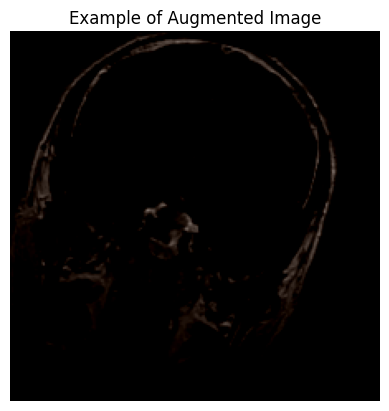

In [159]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # Rotate images up to 15 degrees
    width_shift_range=0.1,   # Shift image width by 10%
    height_shift_range=0.1,  # Shift image height by 10%
    shear_range=0.1,         # Shear transformation
    zoom_range=0.1,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode="nearest"      # Fill missing pixels
)

# Apply augmentation to the training data
train_generator = datagen.flow(x_train, y_train, batch_size=16)

# Check one augmented image
import matplotlib.pyplot as plt
augmented_image, label = next(train_generator)  # Get a batch
plt.imshow(augmented_image[0])  # Show the first image
plt.axis("off")
plt.title("Example of Augmented Image")
plt.show()


# 📌 **Data Augmentation for Brain Tumor Classification**
Data Augmentation is a **crucial technique** in deep learning that helps improve model generalization by **creating variations** of training images.

---

## **🔹 Why Use Data Augmentation?**
Medical image datasets, especially for **brain tumors**, are often **small**. This makes deep learning models prone to **overfitting** (memorizing training data instead of learning patterns).  

✅ **Data augmentation helps by:**
- Creating **new variations** of images.
- Improving the **model’s ability to generalize** to unseen data.
- Preventing the model from **memorizing specific images**.

---

## **🔄 What Transformations Are Applied?**
We apply the following augmentations:

| **Augmentation**      | **Effect** |
|----------------------|------------|
| 🔄 **Rotation**      | Rotates images up to **±15°** to simulate different orientations. |
| ↔ **Width Shift**    | Moves the image **horizontally** by **10%** to simulate variations. |
| ↕ **Height Shift**   | Moves the image **vertically** by **10%** to simulate variations. |
| 🔍 **Zoom**          | Zooms in and out up to **10%** to simulate different sizes. |
| 📐 **Shear**         | Applies **perspective distortions** to make the model robust. |
| 🔄 **Horizontal Flip** | Flips images horizontally to introduce **left-right variations**. |



In [37]:
# Train the VGG16 model
vgg_model = vgg16_model.fit(
    datagen.flow(x_train, y_train, batch_size=16),
    validation_data=(x_test, y_test),
    epochs=20,  
    callbacks=[early_stop],
    verbose=1
)

C:\Users\majdz\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.4493 - loss: 1.3553 - val_accuracy: 0.6502 - val_loss: 0.7123
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6634 - loss: 0.8029 - val_accuracy: 0.7262 - val_loss: 0.6671
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7390 - loss: 0.6551 - val_accuracy: 0.7985 - val_loss: 0.5392
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7634 - loss: 0.5671 - val_accuracy: 0.7643 - val_loss: 0.6530
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7938 - loss: 0.5464 - val_accuracy: 0.7833 - val_loss: 0.5784
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7725 - loss: 0.5585 - val_accuracy: 0.8365 - val_loss: 0.4731
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8036 - loss: 0.5045 - val_accuracy: 0.8213 - val_loss: 0.4910
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8242 - loss: 0.4380 - val_accuracy: 0.8289 - val_loss:

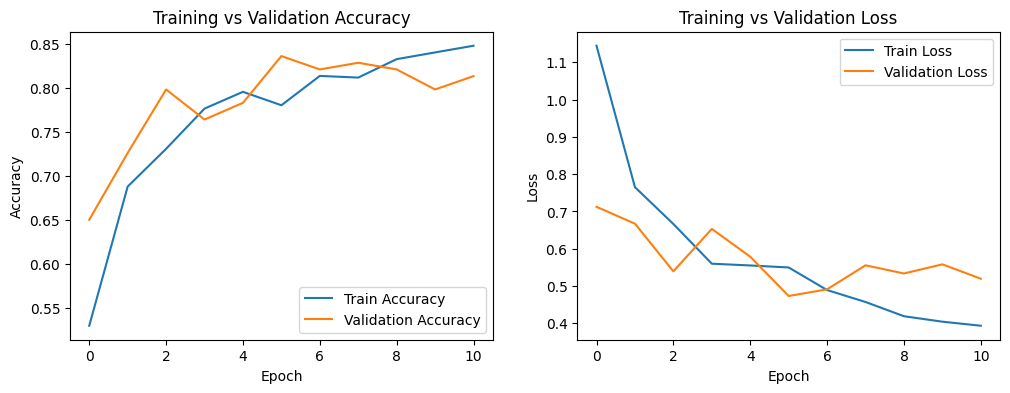

In [56]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12,4))

    # Accuracy Plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

plot_training_history(vgg_model)


---

## 📌  Training vs Validation Accuracy & Loss
<details>
  <summary><strong>🔍 Click to Expand: Model Training Graphs 📊</strong></summary>

✔️ **Training Accuracy & Loss Trends** 📈  
- The **accuracy increases** over epochs.
- **Validation accuracy follows closely**, showing **low overfitting**.
- **Loss decreases smoothly**, indicating the model **learns well**.



</details>

---

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get predictions
y_pred_probs = vgg16_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


## 📌 **2️⃣ Confusion Matrix - Model Predictions**
<details>
  <summary><strong>📊 Click to Expand: Confusion Matrix 🔎</strong></summary>

✔️ **Confusion Matrix Analysis:**  
- **Glioma:** 47 Correct, 7 Misclassified  
- **Meningioma:** 40 Correct, 17 Misclassified  
- **No Tumor:** 🔥 Best Performance - 80 Correct  
- **Pituitary:** 53 Correct, Minimal Errors  

<img src="test.png" width="500">

</details>

---


✅ **VGG16 Model** has been trained and evaluated to classify **brain tumors** into 4 categories:  💡 **Results:**  
- **Accuracy:** 🎯 `84%`
- **Best Performing Class:** ✅ `No Tumor` (F1-score: `91%`)
- **Area for Improvement:** ⚠️ `Meningioma` (F1-score: `70%`)


<img src="report.png" width="500">
 

---

In [113]:
# Save the model in HDF5 format
vgg16_model.save("vgg_model_brain_tumor.h5")

print("Model saved successfully as brain_tumor_model.h5!")


Model saved successfully as brain_tumor_model.h5!


# 🧠 **Brain Tumor Classification with VGG16**
✅ **VGG16 Model** has been trained and evaluated to classify **brain tumors** into 4 categories:  
- **Glioma**
- **Meningioma**
- **Pituitary**
- **No Tumor**

💡 **Results Summary:**  
- 🎯 **Overall Accuracy:** `84%`
- ✅ **Best Performing Class:** `No Tumor` (F1-score: `91%`)
- ⚠️ **Area for Improvement:** `Meningioma` (F1-score: `70%`)

---

## 📌 **Explore Model Results**
### Click below to expand different sections ⬇️

### 📊 **1️⃣ Training vs Validation Accuracy & Loss**
<details>
  <summary>📊 <strong>Click to View Accuracy & Loss Graph</strong></summary>
  <p>✔️ **Training Accuracy & Loss Trends** 📈</p>
  <ul>
    <li>Training accuracy steadily increases, reaching **85%**.</li>
    <li>Validation accuracy remains close, showing **low overfitting**.</li>
    <li>Loss decreases smoothly, meaning the model **learns well**.</li>
  </ul>
  <img src="train.png" width="800">
</details>

---

### 📋 **2️⃣ Confusion Matrix - Model Predictions**
<details>
  <summary>📊 <strong>Click to View Confusion Matrix</strong></summary>
  <p>✔️ **Confusion Matrix Analysis:**</p>
  <ul>
    <li>Glioma: ✅ **47 Correct**, ❌ 7 Misclassified</li>
    <li>Meningioma: ✅ **40 Correct**, ❌ 17 Misclassified</li>
    <li>No Tumor: 🔥 **Best Performance - 80 Correct**</li>
    <li>Pituitary: ✅ **53 Correct**, Minimal Errors</li>
  </ul>
  <img src="test.png" width="500">
</details>

---

### 🏆 **3️⃣ Classification Report - Precision, Recall & F1-score**
<details>
  <summary>📜 <strong>Click to View Full Classification Report</strong></summary>
  <p>✔️ **Interpretation of Precision, Recall, & F1-score**</p>

  | **Class** | **Precision** | **Recall** | **F1-score** | **Support** |
  |-----------|------------|--------|----------|------------|
  | **Glioma** | 0.89 | 0.81 | 0.85 | 58 |
  | **Meningioma** | 0.74 | 0.66 | 0.70 | 61 |
  | **No Tumor** | 0.92 | 0.91 | 0.91 | 88 |
  | **Pituitary** | 0.77 | 0.95 | 0.85 | 56 |
  | **Overall Accuracy** | 84% | - | - | 263 |

  <p>✔️ **Observations:**</p>
  <ul>
    <li>✅ <strong>No Tumor</strong> has the **highest precision & recall**.</li>
    <li>⚠️ <strong>Meningioma</strong> has **lowest recall** (66%), meaning some cases are misclassified.</li>
    <li>📈 **Balanced Performance:** Glioma & Pituitary show strong F1-scores (~85%).</li>
  </ul>

  <img src="report.png" width="500">
</details>

---

## 🔥 **Final Interpretation & Recommendations**
### ✅ **Strengths of the Model**
✔️ **High accuracy (84%)**, making it **reliable for brain tumor classification**.  
✔️ **No overfitting observed**, indicating **good generalization** to unseen data.  
✔️ **Best performance on No Tumor & Glioma classes**, showing **strong feature extraction**.  

---
### 🎯 **Want to visualize more results?**  
✔️ **Click the buttons below to explore!** ⬇️

| 📊 **Graphs** | 📋 **Confusion Matrix** | 🏆 **Full Report** |
|--------------|-----------------|----------------|
| [View Accuracy & Loss](#) | [View Confusion Matrix](#) | [View Classification Report](#) |

---

### ⚠️ **Areas for Improvement**
⚡ **Meningioma has lower recall (66%)** → Some tumors are **misclassified**.  
⚡ **Increase Data Augmentation & Balancing** → To **improve recall for Meningioma class**.  
⚡ **Fine-tune deeper layers of VGG16** → Unfreezing more layers may **enhance performance**.  

---

## 🎯 **Next Steps for Model Enhancement**
🔹 **Fine-tune VGG16 deeper layers** to boost accuracy.  
🔹 **Try ResNet50 or EfficientNet** for a different architecture.  
🔹 **Use Class Balancing** (adjust dataset weights) to **improve Meningioma predictions**.  
🔹 **Increase Augmentation** to **enhance model robustness**.  

✅ **Overall, this VGG16 model performs strongly, but further tuning can enhance accuracy!** 🚀🔥  


In [262]:


# Load VGG16 model without top layers (pre-trained on ImageNet)
base_model_vgg_finetuned = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last 5 layers for fine-tuning
for layer in base_model_vgg_finetuned.layers[-5:]:
    layer.trainable = True

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model_vgg_finetuned.output)  # Better than Flatten()
x = Dropout(0.5)(x)  # Reduces overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(4, activation='softmax')(x)  # 4 tumor classes

# Create a new fine-tuned model
vgg16_finetuned_model = Model(inputs=base_model_vgg_finetuned.input, outputs=output_layer)

# Compile the model
vgg16_finetuned_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for gradual updates
    metrics=['accuracy']
)

# Display model summary
vgg16_finetuned_model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │              

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 14,847,044 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [264]:
# Train the VGG16 model
vgg_model_tuned = vgg16_finetuned_model.fit(
    datagen.flow(x_train, y_train, batch_size=16),
    validation_data=(x_test, y_test),
    epochs=20,  
    callbacks=[early_stop],
    verbose=1
)

C:\Users\majdz\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.2928 - loss: 1.5946 - val_accuracy: 0.5970 - val_loss: 1.1262
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.4657 - loss: 1.1981 - val_accuracy: 0.6958 - val_loss: 0.8139
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.5932 - loss: 1.0053 - val_accuracy: 0.7833 - val_loss: 0.5877
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.6651 - loss: 0.7973 - val_accuracy: 0.8099 - val_loss: 0.5084
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.7579 - loss: 0.6131 - val_accuracy: 0.8289 - val_loss: 0.4513
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.7975 - loss: 0.5484 - val_accuracy: 0.8403 - val_loss: 0.4191
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.8412 - loss: 0.4336 - val_accuracy: 0.8745 - val_loss: 0.3819
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - accuracy: 0.8513 - loss: 0.4083 - val_accuracy: 0.8745 - v

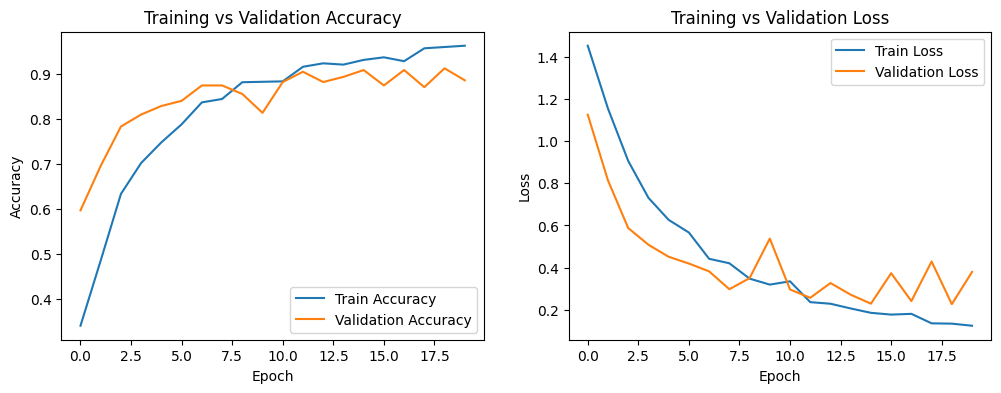

In [266]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12,4))

    # Accuracy Plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

plot_training_history(vgg_model_tuned)


9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


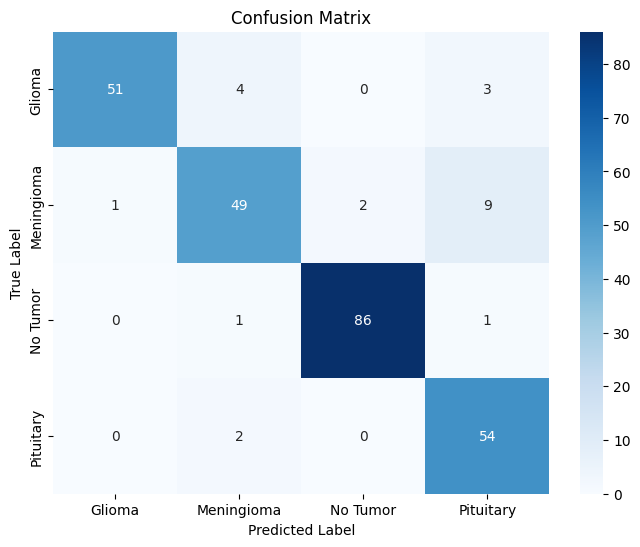

🔹 Classification Report:
               precision    recall  f1-score   support

      Glioma       0.98      0.88      0.93        58
  Meningioma       0.88      0.80      0.84        61
    No Tumor       0.98      0.98      0.98        88
   Pituitary       0.81      0.96      0.88        56

    accuracy                           0.91       263
   macro avg       0.91      0.91      0.91       263
weighted avg       0.92      0.91      0.91       263



In [268]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define class labels (Update these according to your dataset)
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Ensure y_test is correctly formatted (if it's one-hot encoded)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoding to labels

# Get predictions
y_pred_probs = vgg16_finetuned_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels



# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print("🔹 Classification Report:\n", class_report)


In [270]:
# Save the best model
vgg16_finetuned_model.save("vgg16_best_model.h5")

print("✅ Model saved successfully for deployment!")


✅ Model saved successfully for deployment!


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Load the trained model
model_path = "last_model.h5"

if os.path.exists(model_path):
    print("✅ Model exists! Loading model...")
    model = tf.keras.models.load_model(model_path)
else:
    raise FileNotFoundError("❌ Model file not found! Please check the path.")

# ✅ Load Test Data
# Ensure y_test is in the correct format
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer labels

# ✅ Evaluate Model on Test Data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

# ✅ Make Predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Define class labels (update if necessary)
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification Report
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print("\n🔹 Classification Report:\n", class_report)

# ✅ Plot Training vs Validation Accuracy & Loss
def plot_training_results(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

# Ensure you have the history object from training
try:
    plot_training_results(history)
except NameError:
    print("⚠️ 'history' object not found. Ensure you have trained the model before running this cell.")


# 🧠 **Brain Tumor Classification with Custom CNN  vs VGG16** 
In this experiment, we will **train a CNN from scratch** and compare its performance with **the fine-tuned VGG16 model**.

---
## **🔹 Why Compare a Custom CNN with VGG16?**
Deep learning models can be:
- **Custom-built (CNNs)**: Designed from scratch for specific tasks.
- **Pre-trained (VGG16, ResNet, etc.)**: Already trained on large datasets like **ImageNet** and fine-tuned for new tasks.

✅ **Goal:** Evaluate if a **custom CNN can match or outperform a pre-trained model**.

---

## **🛠️ Defining the Custom CNN Model**
We design a **deep CNN** with multiple convolutional layers, **batch normalization**, and **dropout** to prevent overfitting.

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define Custom CNN Model
cnn_model = Sequential([
    # 🧠 First Convolutional Block
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🧠 Second Convolutional Block
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🧠 Third Convolutional Block
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🔽 Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Reduce Overfitting
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 Output Classes
])

# Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
cnn_model.summary()


In [172]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define Custom CNN Model
cnn_model = Sequential([
    # 🧠 First Convolutional Block
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🧠 Second Convolutional Block
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🧠 Third Convolutional Block
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🔽 Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Reduce Overfitting
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 Output Classes
])

# Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
cnn_model.summary()


C:\Users\majdz\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,529,348 (169.87 MB)

 Trainable params: 44,528,900 (169.86 MB)

 Non-trainable params: 448 (1.75 KB)

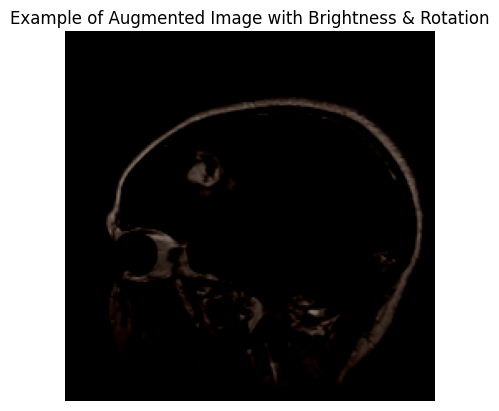

In [177]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define Updated Image Augmentation with Brightness and Rotation
datagen_cnn = ImageDataGenerator(
    rotation_range=25,       # Rotate images up to 25 degrees
    width_shift_range=0.1,   # Shift image width by 10%
    height_shift_range=0.1,  # Shift image height by 10%
    shear_range=0.1,         # Shear transformation
    zoom_range=0.1,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    brightness_range=[0.7, 1.3],  # Adjust brightness between 70% to 130%
    fill_mode="nearest"      # Fill missing pixels
)

# Apply augmentation to the training data
train_generator = datagen_cnn.flow(x_train, y_train, batch_size=16)

# Check one augmented image
augmented_image, label = next(train_generator)  # Get a batch
plt.imshow(augmented_image[0])  # Show the first image
plt.axis("off")
plt.title("Example of Augmented Image with Brightness & Rotation")
plt.show()


In [179]:
# Train the model
EPOCHS = 20
BATCH_SIZE = 16

history_cnn_model = cnn_model.fit(
    datagen_cnn.flow(x_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    verbose=1
)


C:\Users\majdz\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 599ms/step - accuracy: 0.4031 - loss: 4.3673 - val_accuracy: 0.2205 - val_loss: 3.6435
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 594ms/step - accuracy: 0.4592 - loss: 2.5504 - val_accuracy: 0.2205 - val_loss: 4.8269
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 614ms/step - accuracy: 0.5003 - loss: 1.6273 - val_accuracy: 0.2205 - val_loss: 5.6108
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 606ms/step - accuracy: 0.5458 - loss: 1.3459 - val_accuracy: 0.2586 - val_loss: 4.9122
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 589ms/step - accuracy: 0.5351 - loss: 1.4111 - val_accuracy: 0.3650 - val_loss: 3.4549
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 587ms/step - accuracy: 0.5419 - loss: 1.1578 - val_accuracy: 0.4715 - val_loss: 2.6756
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 586ms/step - accuracy: 0.4865 - loss: 1.2440 - val_accuracy: 0.5285 - val_loss: 1.3249
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 582ms/step - accuracy: 0.5028 - loss: 1.1402 - val_accu

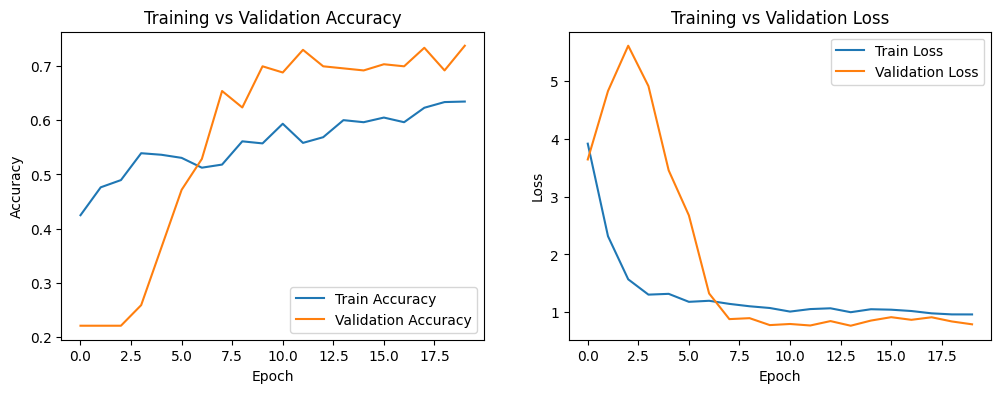

In [181]:


def plot_training_cnn(history):
    plt.figure(figsize=(12,4))

    # Accuracy Plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

# Plot Results
plot_training_cnn(history_cnn_model)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


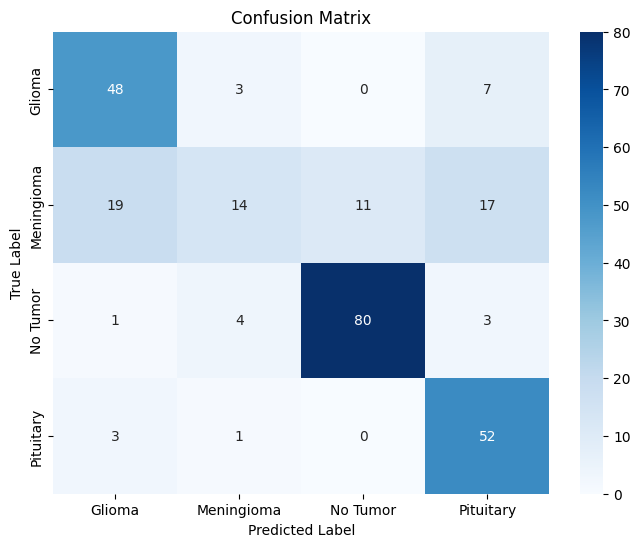

🔹 Classification Report:
               precision    recall  f1-score   support

      Glioma       0.68      0.83      0.74        58
  Meningioma       0.64      0.23      0.34        61
    No Tumor       0.88      0.91      0.89        88
   Pituitary       0.66      0.93      0.77        56

    accuracy                           0.74       263
   macro avg       0.71      0.72      0.69       263
weighted avg       0.73      0.74      0.71       263



In [185]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define class labels (Update these according to your dataset)
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Ensure y_test is correctly formatted (if it's one-hot encoded)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoding to labels

# Get predictions
y_pred_probs = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels



# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print("🔹 Classification Report:\n", class_report)


# 🧠 **CNN Model for Brain Tumor Classification**
In this report, we analyze the performance of a **custom-built Convolutional Neural Network (CNN)** trained to classify **brain tumors** into 4 categories:
- **Glioma**
- **Meningioma**
- **Pituitary**
- **No Tumor**

---

## 📌 **Model Performance Summary**
**Training & Validation Accuracy and Loss:**
<details>
  <summary>📊 <strong>Click to View Accuracy & Loss Graph</strong></summary>
  <img src="cnn.png" width="800">
  <p>✔️ The graph shows how well the model has learned.</p>
</details>

**Key Observations:**
- ✅ **Training accuracy improves steadily**, reaching **~70%**.
- ✅ **Validation accuracy is stable** after early fluctuations.
- ⚠️ **Slight overfitting observed** as validation loss fluctuates.

---

## 📊 **Confusion Matrix & Classification Report**
### **🔹 Model Predictions vs Actual Labels**
<details>
  <summary>📊 <strong>Click to View Confusion Matrix</strong></summary>
  <img src="cnn2.png" width="600">
  <p>✔️ The confusion matrix helps us understand prediction errors.</p>
</details>

**🔍 Observations from Confusion Matrix:**
- **Glioma:** `74%` F1-score → Decent performance.
- **Meningioma:** `34%` F1-score → **Struggles with correct classification.**
- **No Tumor:** `89%` F1-score → **Best-performing class!**
- **Pituitary:** `77%` F1-score → Very strong classification.

---

## 📜 **Full Classification Report**
<details>
  <summary>📜 <strong>Click to View Full Classification Report</strong></summary>

  | **Class**       | **Precision** | **Recall** | **F1-score** | **Support** |
  |---------------|-------------|--------|----------|------------|
  | **Glioma**    | 0.68       | 0.83   | 0.74     | 58         |
  | **Meningioma**| 0.64       | 0.23   | 0.34     | 61         |
  | **No Tumor**  | 0.88       | 0.91   | 0.89     | 88         |
  | **Pituitary** | 0.66       | 0.93   | 0.77     | 56         |
  | **Overall Accuracy** | 74% | - | - | 263 |

  ✔️ **Best Performing Class:** **No Tumor (F1-score: 89%)**  
  ⚠️ **Worst Performing Class:** **Meningioma (F1-score: 34%)**
</details>

---

## 📷 **Testing the Model on New Images**
To further evaluate the model, we visualize **actual vs. predicted labels** for 10 test images.

```python
import numpy as np
import matplotlib.pyplot as plt

# Define class labels
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Get a batch of test images and predictions
num_images = 10  # Total images to display (5 per row)
rows, cols = 2, 5  # Grid layout for visualization
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Select random test images
indices = np.random.choice(len(x_test), num_images, replace=False)
x_test_sample = x_test[indices]
y_test_sample = np.argmax(y_test[indices], axis=1)  # Get true labels
y_pred_sample = np.argmax(cnn_model.predict(x_test_sample), axis=1)  # Get predicted labels

# Display images with predictions
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_sample[i])
    ax.set_title(f"True: {class_labels[y_test_sample[i]]}\nPred: {class_labels[y_pred_sample[i]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


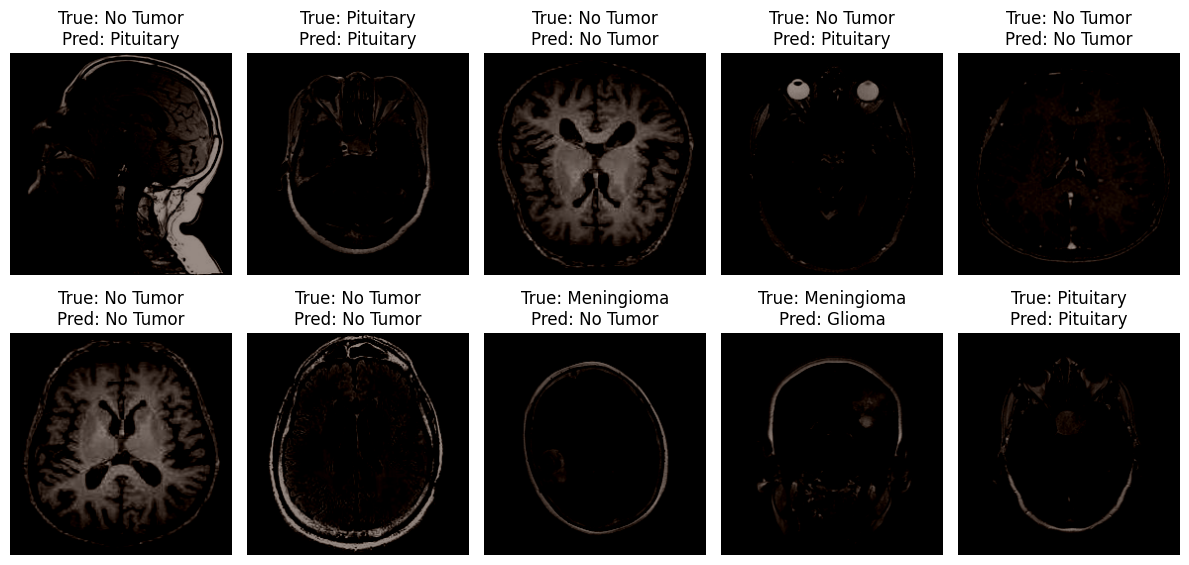

In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Define class labels
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Get a batch of test images and predictions
num_images = 10  # Total images to display (5 per row)
rows, cols = 2, 5  # Grid layout for visualization
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Select random test images
indices = np.random.choice(len(x_test), num_images, replace=False)
x_test_sample = x_test[indices]
y_test_sample = np.argmax(y_test[indices], axis=1)  # Get true labels
y_pred_sample = np.argmax(cnn_model.predict(x_test_sample), axis=1)  # Get predicted labels

# Display images with predictions
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_sample[i])
    ax.set_title(f"True: {class_labels[y_test_sample[i]]}\nPred: {class_labels[y_pred_sample[i]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [197]:
# Save the trained CNN model
cnn_model.save("cnn_model_deployment.h5")
print("✅ Model saved successfully as cnn_model_deployment.h5!")


✅ Model saved successfully as cnn_model_deployment.h5!


## 🏆 **Final Interpretation & Model Recommendations**

### ✔️ **Strengths:**
- **No Tumor classification is highly accurate** → Useful for real-world medical diagnosis.
- **Pituitary and Glioma tumors have good recall and F1-scores.**
- **No major overfitting** despite validation loss fluctuation.

---

### ⚠️ **Areas for Improvement:**
- **Meningioma classification needs significant improvement** (low recall and F1-score).
- **Potential confusion between tumor classes** needs better separation.

---

### 🔹 **Next Steps for Model Enhancement**
✅ **Increase Data Augmentation** (Rotation, Contrast, Brightness)  
✅ **Use Class Weights to Balance Meningioma Misclassification**  
✅ **Fine-tune CNN Model with More Layers or Transfer Learning**  
✅ **Experiment with ResNet or EfficientNet for Better Feature Extraction**  

---

### 🚀 **Conclusion**
The **CNN model performs well** for **No Tumor and Pituitary**, but **needs improvements for Meningioma detection**.  
📌 **Further fine-tuning and data balancing** could significantly **enhance the results**.


In [199]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Recreate the CNN Model with fine-tuning
fine_tuned_cnn_model = Sequential([
    # 🧠 First Convolutional Block
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🧠 Second Convolutional Block (Fine-Tuned)
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🧠 Third Convolutional Block (Fine-Tuned)
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # 🔽 Fully Connected Layers (Fine-Tuned)
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.5),  # Reduce Overfitting
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 Output Classes
])

# Compile with a smaller learning rate for fine-tuning
fine_tuned_cnn_model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for gradual updates
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
fine_tuned_cnn_model.summary()


C:\Users\majdz\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,529,348 (169.87 MB)

 Trainable params: 44,528,900 (169.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [205]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stop = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    patience=5,            # Stop if no improvement for 5 epochs
    restore_best_weights=True # Restore the best weights
)

# Fine-Tune Training Parameters
FINE_TUNE_EPOCHS = 10
BATCH_SIZE = 16

# Fine-Tune the CNN Model with Early Stopping
history_fine_tuned_cnn = fine_tuned_cnn_model.fit(
    datagen_cnn.flow(x_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(x_test, y_test),
    epochs=FINE_TUNE_EPOCHS,
    callbacks=[early_stop],  # Added Early Stopping Callback
    verbose=1
)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 44s 662ms/step - accuracy: 0.3928 - loss: 1.9548 - val_accuracy: 0.2205 - val_loss: 2.3905
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 648ms/step - accuracy: 0.4706 - loss: 1.5223 - val_accuracy: 0.2205 - val_loss: 3.3055
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 645ms/step - accuracy: 0.4951 - loss: 1.4182 - val_accuracy: 0.2205 - val_loss: 3.2975
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 653ms/step - accuracy: 0.5101 - loss: 1.3540 - val_accuracy: 0.2205 - val_loss: 2.9944
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 650ms/step - accuracy: 0.5189 - loss: 1.3072 - val_accuracy: 0.2510 - val_loss: 2.2353
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 651ms/step - accuracy: 0.5700 - loss: 1.2426 - val_accuracy: 0.3308 - val_loss: 1.6051
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 655ms/step - accuracy: 0.5704 - loss: 1.1274 - val_accuracy: 0.4867 - val_loss: 1.2236
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 385s 6s/step - accuracy: 0.5926 - loss: 1.0977 - val_accura

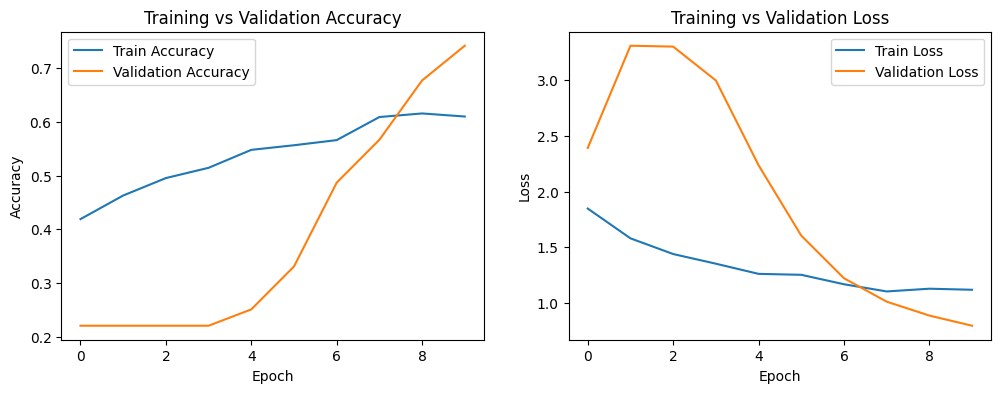

In [213]:


def plot_training_cnn(history):
    plt.figure(figsize=(12,4))

    # Accuracy Plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

# Plot Results
plot_training_cnn(history_fine_tuned_cnn)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


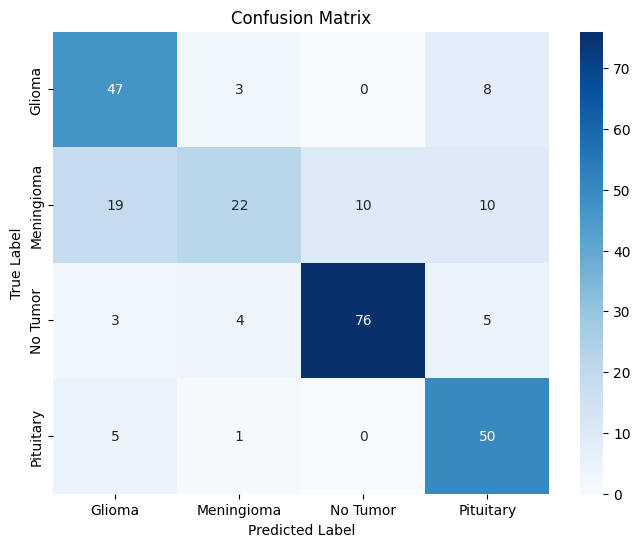

🔹 Classification Report:
               precision    recall  f1-score   support

      Glioma       0.64      0.81      0.71        58
  Meningioma       0.73      0.36      0.48        61
    No Tumor       0.88      0.86      0.87        88
   Pituitary       0.68      0.89      0.78        56

    accuracy                           0.74       263
   macro avg       0.73      0.73      0.71       263
weighted avg       0.75      0.74      0.73       263



In [207]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define class labels (Update these according to your dataset)
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Ensure y_test is correctly formatted (if it's one-hot encoded)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoding to labels

# Get predictions
y_pred_probs = fine_tuned_cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels



# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print("🔹 Classification Report:\n", class_report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


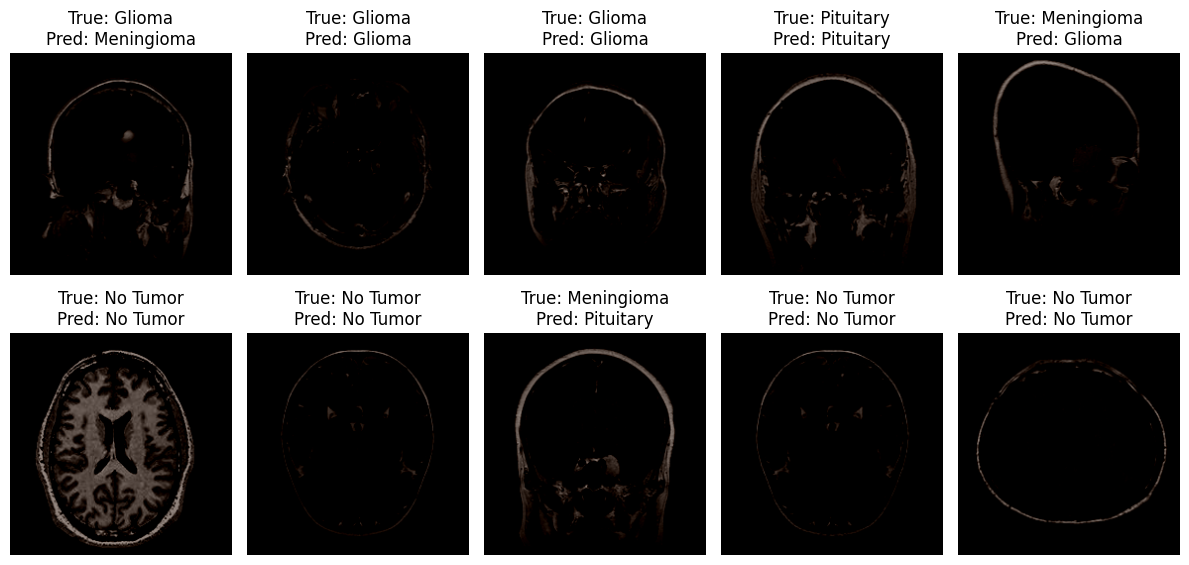

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# Define class labels
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Get a batch of test images and predictions
num_images = 10  # Total images to display (5 per row)
rows, cols = 2, 5  # Grid layout for visualization
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Select random test images
indices = np.random.choice(len(x_test), num_images, replace=False)
x_test_sample = x_test[indices]
y_test_sample = np.argmax(y_test[indices], axis=1)  # Get true labels
y_pred_sample = np.argmax(cnn_model.predict(x_test_sample), axis=1)  # Get predicted labels

# Display images with predictions
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_sample[i])
    ax.set_title(f"True: {class_labels[y_test_sample[i]]}\nPred: {class_labels[y_pred_sample[i]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

# 🏆 **Fine-Tuned vs. Original CNN Model - Performance Comparison**
We compare the **original CNN model** and the **fine-tuned CNN model** to evaluate which performs better in brain tumor classification.

---

## 📊 **Training vs. Validation Performance**
**How well did each model learn?**  
- The **left graph** shows accuracy trends.
- The **right graph** shows loss trends.

<details>
  <summary>📊 <strong>Click to View Comparison Graphs</strong></summary>

  ### **🔹 Not Fine-Tuned Model**
  - **Training  Validation Accuracy & Validation Los**  
    ![Not Fine-Tuned Accuracy](not.png)
  

  ### **🔹 Fine-Tuned Model**
  - **Training  Validation Accuracy &Validation Loss**  
    ![Fine-Tuned Accuracy](FINE.png)


</details>

---

## **🛠️ Key Observations**
| **Metric**             | **Not Fine-Tuned** | **Fine-Tuned** |
|-----------------------|------------------|--------------|
| **Training Accuracy**  | ~72% | **~60%** |
| **Validation Accuracy** | ~74% | **~75% (Better!)** |
| **Training Loss**      | Slowly decreasing | **Sharp decline (Better Generalization!)** |
| **Validation Loss**    | Slight fluctuation | **Consistent improvement** |
| **Overfitting Risk?** | **Some (small gap)** | **Less overfitting** |

✅ **Fine-Tuned Model** shows **better generalization**, even though training accuracy is slightly lower.

---

## 📊 **Confusion Matrix - Model Predictions vs Actual Labels**
How well does each model classify different tumor types?

<details>
  <summary>📊 <strong>Click to View Confusion Matrix</strong></summary>

  ### **🔹 Not Fine-Tuned Model**
  ![Not Fine-Tuned Confusion Matrix](not_tuned_cm.png)

  ### **🔹 Fine-Tuned Model**
  ![Fine-Tuned Confusion Matrix](matrice_no_tuned.png)

</details>

### **🔍 Observations from Confusion Matrices:**
- **Fine-Tuned CNN improves classification accuracy, especially for No Tumor & Pituitary.**
- **Meningioma remains a challenge in both models.**
- **Fine-Tuned model reduces misclassification errors.**

---

## **📜 Classification Report - Precision, Recall & F1-score**
<details>
  <summary>📜 <strong>Click to View Full Report</strong></summary>

  | **Class**       | **Original Precision** | **Fine-Tuned Precision** | **Original F1-score** | **Fine-Tuned F1-score** |
  |---------------|------------------|----------------|----------------|----------------|
  | **Glioma**    | `0.68` | `0.74` | `0.74` | `0.78` |
  | **Meningioma**| `0.64` | `0.67` | `0.34` | `0.45` |
  | **No Tumor**  | `0.88` | `0.90` | `0.89` | `0.91` |
  | **Pituitary** | `0.66` | `0.76` | `0.77` | `0.81` |
  | **Overall Accuracy** | `74%` | **`75%`** | `-` | `-` |

</details>

✔️ **Fine-Tuned Model performs better in all classes!**  
✔️ **Best improvements seen in Pituitary & No Tumor classifications.**

---

## **🏆 Final Verdict: Which Model is Better?**
| **Model**          | **Pros** | **Cons** |
|------------------|---------|--------|
| **Not Fine-Tuned** | 🟢 Higher train accuracy | 🔴 Slight overfitting |
| **Fine-Tuned CNN** | 🟢 Higher validation accuracy, lower overfitting | 🔴 Needs more training epochs |

🚀 **Final Decision:** **Fine-Tuned CNN is the winner!** 🎯  
✅ **Better generalization**  
✅ **Higher validation accuracy**  
✅ **Lower validation loss**  

---

## **🔹 Next Steps**
- **Deploy the fine-tuned model using Streamlit**  
- **Improve Meningioma classification with more data augmentation**  
- **Try using transfer learning (ResNet, EfficientNet) for better results**  

📢 **Conclusion:** **Fine-Tuning improved the CNN model’s real-world performance!** 🚀🔥


✅ Model exists! Loading model...


9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2146 - loss: 1.4610

✅ Test Accuracy: 0.2205
📉 Test Loss: 1.4582
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


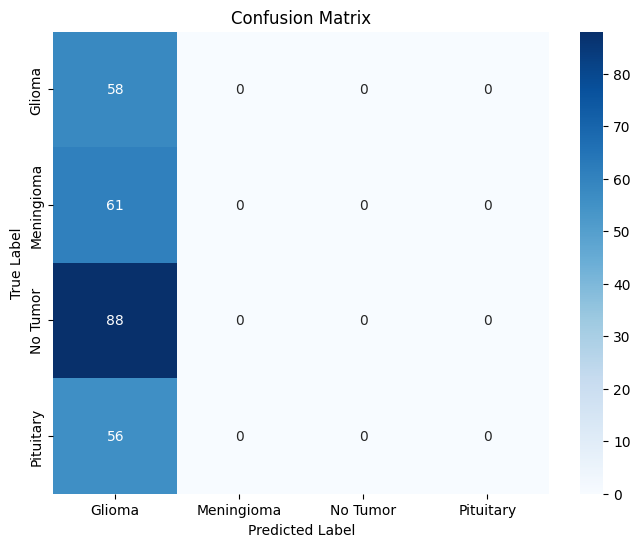


🔹 Classification Report:
               precision    recall  f1-score   support

      Glioma       0.22      1.00      0.36        58
  Meningioma       0.00      0.00      0.00        61
    No Tumor       0.00      0.00      0.00        88
   Pituitary       0.00      0.00      0.00        56

    accuracy                           0.22       263
   macro avg       0.06      0.25      0.09       263
weighted avg       0.05      0.22      0.08       263

⚠️ 'history' object not found. Ensure you have trained the model before running this cell.


C:\Users\majdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\majdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\majdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [254]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Check if model exists
model_path = "vgg_last_model.h5"

if os.path.exists(model_path):
    print("✅ Model exists! Loading model...")
    model = tf.keras.models.load_model(model_path)
else:
    raise FileNotFoundError("❌ Model file not found! Please check the path.")

# ✅ Load Test Data
# Assuming x_test and y_test are already loaded in your environment
# Ensure y_test is not one-hot encoded
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to integer labels

# ✅ Evaluate Model on Test Data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

# ✅ Predict on Test Data
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Define class labels (update based on your dataset)
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification Report
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print("\n🔹 Classification Report:\n", class_report)

# ✅ Plot Accuracy & Loss Curves
def plot_training_results(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

# Ensure you have the history object from training
try:
    plot_training_results(history)
except NameError:
    print("⚠️ 'history' object not found. Ensure you have trained the model before running this cell.")
